In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import optimize
from scipy.stats import multivariate_normal
import pandas as pd
import os
from math import *

In [68]:
# A=np.array([[1,2,3],[4,5,6]])
# p,s,q=np.linalg.svd(A,full_matrices=True)
# s_a=np.zeros(A.shape)
# for i in range(2): s_a[i,i]=s[i]
# p @ s_a @ q

array([[1., 2., 3.],
       [4., 5., 6.]])

In [104]:
def svd_man(A):
    C_m=A @ A.transpose()
    lam_m,q_m=np.linalg.eig(C_m)
    idx = lam_m.argsort()[::-1]         #Eigen Values and corresponding eigen vectors are sorted in descending order
    lam_m = lam_m[idx]
    q_m = q_m[:,idx]
    C_n=A.transpose() @ A
    lam_n,q_n=np.linalg.eig(C_n)
    idx = lam_n.argsort()[::-1]         #Eigen Values and corresponding eigen vectors are sorted in descending order
    lam_n = lam_n[idx]
    q_n = q_n[:,idx]
    p=q_m
    if lam_m.size<=lam_n.size:
        s=np.sqrt(lam_m) 
    else:
        s=lam_n
    q=q_n.transpose()
    return p,s,q

In [244]:
# sig=0.2
# mu=1
# l=np.arange(2,10)
# (m,n)=np.random.choice(l,2)
# A=np.random.randn(m,n)*sig + mu
# i=0
# np.linalg.svd(A)[i]-svd_man(A)[i]

array([[-5.55111512e-17, -3.33066907e-16,  3.55271368e-15,
         6.88338275e-15, -2.49800181e-15],
       [ 0.00000000e+00, -1.05471187e-15, -4.49640325e-15,
         1.02140518e-14,  5.55111512e-15],
       [ 0.00000000e+00,  1.36002321e-15,  2.66453526e-15,
         2.66453526e-15, -3.28903571e-15],
       [ 5.55111512e-17,  3.05311332e-16,  5.99520433e-15,
        -3.65818487e-14,  4.44089210e-16],
       [ 3.33066907e-16, -3.33066907e-16, -8.21565038e-15,
         2.14203655e-14, -2.22044605e-16]])

In [311]:
def vineBeta(d,betaparam):               #50,20,10,5,2,1 - values of betaparameter for decreasing correlation
    P=np.zeros((d,d))
    S=np.eye(d)
    for k in range(d-1):
        for i in range(k+1,d):
            P[k,i]=np.random.beta(betaparam,betaparam)
            P[k,i]=2*(P[k,i]-0.5)
            p=P[k,i]
            for l in range(k-1,-1,-1):
                p=p*sqrt((1-(P[l,i])**2)*(1-(P[l,k])**2))+P[l,i]*P[l,k]
            S[k,i]=p
            S[i,k]=p
    idx=np.random.permutation(d)
    S=S[idx,:]
    S=S[:,idx]
    return S
def highly_correlated_random_matrix(x,betaparam):
    r=vineBeta(x.shape[1],betaparam)                     # Assuming columns represents dimensions
    c=np.linalg.cholesky(r)
    y=c @ x
    return y

In [312]:
# Demonstration of use of above function
x=np.random.random((100,100))#Random uniform 100x100 matrix
betaparam=50 #For high correlation
highly_correlated_random_matrix(x,betaparam)

array([[ 4.06239061e-01,  8.84562700e-01,  3.71947328e-01, ...,
         8.58374697e-01,  4.50212653e-01,  1.83593325e-01],
       [ 4.75816221e-02,  5.79341262e-01,  5.77907797e-01, ...,
         8.05771562e-01,  7.48250604e-01,  8.74495454e-01],
       [ 2.11455556e-01,  1.00936453e+00,  4.23300104e-01, ...,
         8.71892291e-01,  5.65483638e-01,  6.23964060e-01],
       ...,
       [ 5.01122453e-01,  3.87093081e-02,  1.84440823e-01, ...,
        -2.06710777e-04,  3.55865638e-01, -2.75969461e-01],
       [-1.48019137e-01,  2.14188166e-01,  6.76064850e-01, ...,
         5.75253673e-01, -1.58174146e-01,  2.08530245e-01],
       [ 3.48917414e-01,  5.15214523e-01,  3.06484375e-01, ...,
        -2.73301965e-01,  9.17149925e-02,  6.68639644e-01]])

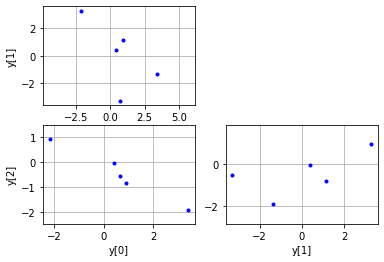

In [288]:
# """Example of generating correlated normally distributed random samples."""

# import numpy as np
# from scipy.linalg import eigh, cholesky
# from scipy.stats import norm

# from pylab import plot, show, axis, subplot, xlabel, ylabel, grid


# # Choice of cholesky or eigenvector method.
# method = 'cholesky'
# #method = 'eigenvectors'

# num_samples = 5

# # The desired covariance matrix.
# r = np.array([
#         [  3.40, -2.75, -2.00],
#         [ -2.75,  5.50,  1.50],
#         [ -2.00,  1.50,  1.25]
#     ])

# # Generate samples from three independent normally distributed random
# # variables (with mean 0 and std. dev. 1).
# x = norm.rvs(size=(3, num_samples))

# # We need a matrix `c` for which `c*c^T = r`.  We can use, for example,
# # the Cholesky decomposition, or the we can construct `c` from the
# # eigenvectors and eigenvalues.

# if method == 'cholesky':
#     # Compute the Cholesky decomposition.
#     c = cholesky(r, lower=True)
# else:
#     # Compute the eigenvalues and eigenvectors.
#     evals, evecs = eigh(r)
#     # Construct c, so c*c^T = r.
#     c = np.dot(evecs, np.diag(np.sqrt(evals)))

# # Convert the data to correlated random variables. 
# y = np.dot(c, x)

# #
# # Plot various projections of the samples.
# #
# subplot(2,2,1)
# plot(y[0], y[1], 'b.')
# ylabel('y[1]')
# axis('equal')
# grid(True)

# subplot(2,2,3)
# plot(y[0], y[2], 'b.')
# xlabel('y[0]')
# ylabel('y[2]')
# axis('equal')
# grid(True)

# subplot(2,2,4)
# plot(y[1], y[2], 'b.')
# xlabel('y[1]')
# axis('equal')
# grid(True)

# show()

In [289]:
# x = norm.rvs(size=(3, num_samples))
# x

array([[ 0.40849783,  1.95054881,  0.43107583,  1.13762679, -0.27626755],
       [ 0.94260285,  0.85942734,  0.60848631, -0.56986569,  1.28786325],
       [-0.8818074 ,  0.58532171,  0.73514386,  0.87922652,  1.14575567]])